In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from vc_sample.density_estimation import KernelDensityEstimator, Kernel, epanechnikov, kernel_scale_factor
from vc_sample.void_and_cluster import VoidAndCluster
from vc_sample import spectral_analysis

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Sampling in 1D

In [20]:
xs = np.linspace(0.0, 10.0, 100)
points = xs.reshape(-1, 1)

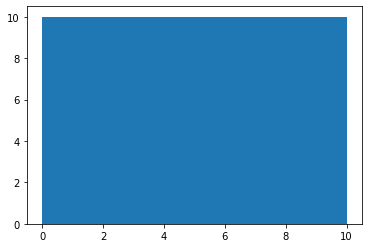

In [21]:
plt.hist(xs);

In [22]:
num_samples = 30

kernel_scale1d = 0.3 * kernel_scale_factor(dimensionality=1, num_points=100, num_samples=num_samples)
kernel_scale1d

1.0

In [23]:
density_estimator = KernelDensityEstimator(points, Kernel(epanechnikov, scale=kernel_scale1d))
vc = VoidAndCluster(density_estimator, points.shape[0], num_initial_samples=10)

sample_indices = vc.sample(size=num_samples)
samples = points[sample_indices]

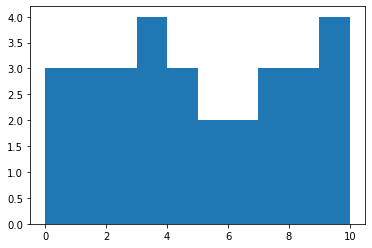

In [24]:
plt.hist(samples);

In contrast, random sampling gives very different results

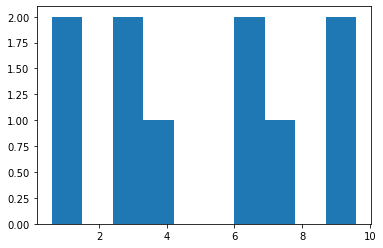

In [25]:
random_samples = np.random.choice(xs, replace=False, size=10)
plt.hist(random_samples);

## Sampling in 2D

In [31]:
num_points = 1000
xs = np.random.uniform(-1.0, 1.0, num_points)
ys = np.random.uniform(-1.0, 1.0, num_points)
points = np.stack([xs, ys]).T

In [32]:
kernel_bandwidth = 0.05 * kernel_scale_factor(dimensionality=2, num_points=num_points, num_samples=100)
kernel_bandwidth

0.158113883008419

In [36]:
density_estimator = KernelDensityEstimator(points, Kernel(epanechnikov, scale=kernel_bandwidth))
vc = VoidAndCluster(density_estimator, num_points, num_initial_samples=50)

sample_indices = vc.sample(size=100)
samples = points[sample_indices]

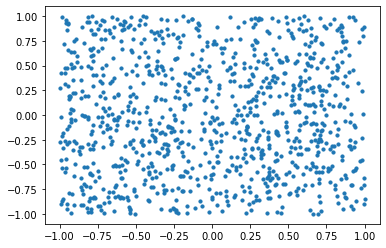

In [37]:
plt.scatter(x=points[:,0], y=points[:,1], s=10);

Not surprisingly, a spectral analysis using the Fourier transform does not show any structure in the data

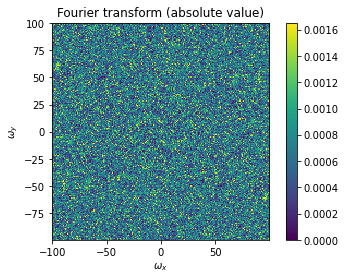

In [38]:
img_full = spectral_analysis.discretize_as_image(xs=points[:,0], ys=points[:,1], resolution=(200, 200))
spectral_analysis.plot_fourier_transform(img_full);

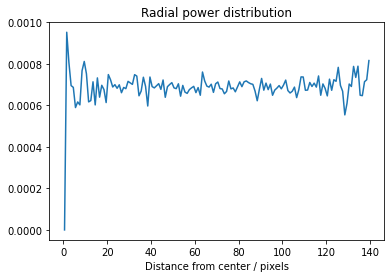

In [39]:
spectral_analysis.plot_power_distribution(img_full);

### Sampled Points

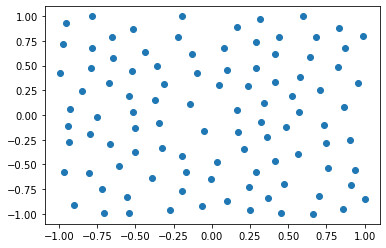

In [40]:
plt.scatter(x=samples[:,0], y=samples[:,1]);

Spectral analysis reveals _blue noise_, i.e. low frequencies have low energy (blue region in the Fourier transform plot)

In [41]:
img_sampled = spectral_analysis.discretize_as_image(xs=samples[:,0], ys=samples[:,1], resolution=(200, 200))

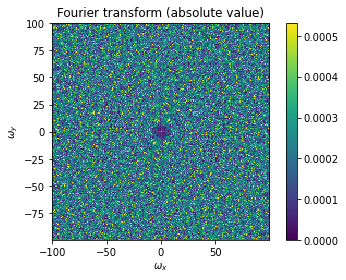

In [42]:
spectral_analysis.plot_fourier_transform(img_sampled);

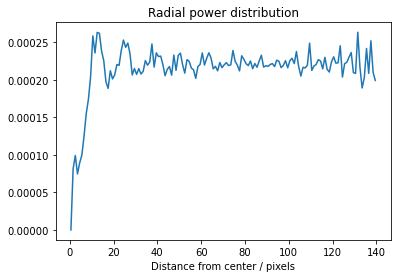

In [43]:
spectral_analysis.plot_power_distribution(img_sampled);

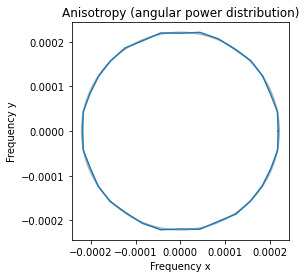

In [44]:
spectral_analysis.plot_anisotropy(img_sampled);

## Sampling a noisy sinus in 2D

In [45]:
num = 1000
num_samples = 200

ys = np.sin(np.linspace(-3.0, 3.0, num)) + np.random.normal(loc=0, scale=0.4, size=num)
xs = np.linspace(-3.0, 3.0, num)
points = np.stack([xs, ys]).T

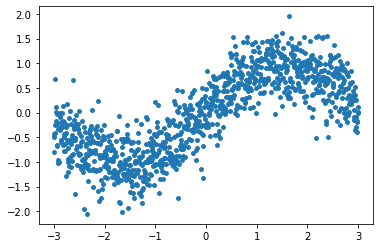

In [46]:
plt.scatter(xs, ys, s=15);

In [47]:
kernel_bandwidth = 0.1 * kernel_scale_factor(dimensionality=2, num_points=num_points, num_samples=num_samples)
kernel_bandwidth

0.223606797749979

In [48]:
density_estimator = KernelDensityEstimator(points, Kernel(epanechnikov, scale=kernel_bandwidth))

The sampling strategy keeps the original density of the data

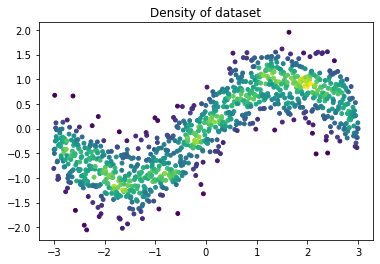

In [49]:
density = density_estimator.estimate()

plt.title('Density of dataset')
plt.scatter(xs, ys, c=density, s=15);

In [53]:
vc = VoidAndCluster(density_estimator, points.shape[0], num_initial_samples=50)
sample_indices = vc.sample(size=num_samples)
samples = points[sample_indices]

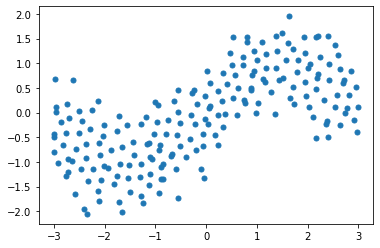

In [54]:
plt.scatter(x=samples[:,0], y=samples[:,1], s=25);

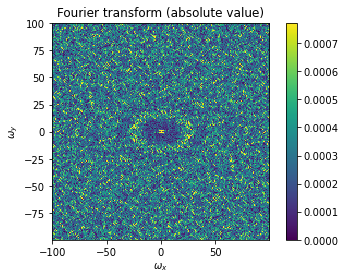

In [55]:
img_sampled = spectral_analysis.discretize_as_image(xs=samples[:,0], ys=samples[:,1], resolution=(200, 200))
spectral_analysis.plot_fourier_transform(img_sampled);

### Sampling a Gaussian in 3D

In [56]:
num = 1000
num_samples = 100

xs = np.random.normal(loc=0, scale=1.0, size=num)
ys = np.random.normal(loc=0, scale=1.0, size=num)
zs = np.random.normal(loc=0, scale=1.0, size=num)
points = np.stack([xs, ys, zs]).T

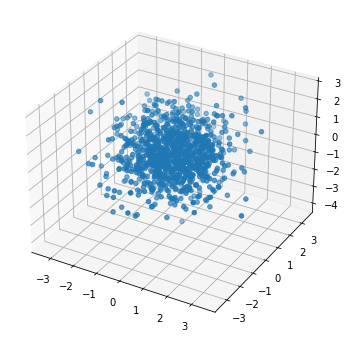

In [57]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs);

In [58]:
kernel_bandwidth = 0.5 * kernel_scale_factor(dimensionality=3, num_points=num_points, num_samples=num_samples)
kernel_bandwidth

1.077217345015942

In [59]:
density_estimator = KernelDensityEstimator(points, Kernel(epanechnikov, scale=kernel_bandwidth))

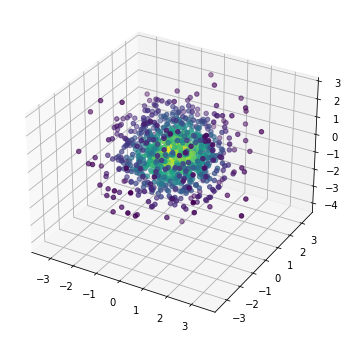

In [60]:
density = density_estimator.estimate()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=density);

In [61]:
vc = VoidAndCluster(density_estimator, points.shape[0], num_initial_samples=50)
sample_indices = vc.sample(size=num_samples)
samples = points[sample_indices]

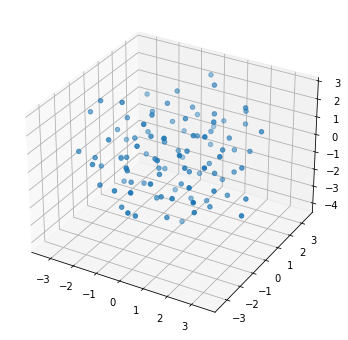

In [62]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[:,0], samples[:,1], samples[:,2]);